# Ejecutar en Colab

In [1]:
# Descargamos una foto
!wget -O picture.jpg https://pixnio.com/free-images/2017/11/30/2017-11-30-18-37-25.jpg

--2023-10-01 21:10:33--  https://pixnio.com/free-images/2017/11/30/2017-11-30-18-37-25.jpg
Resolving pixnio.com (pixnio.com)... 170.249.203.179
Connecting to pixnio.com (pixnio.com)|170.249.203.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 277076 (271K) [image/jpeg]
Saving to: ‘picture.jpg’

picture.jpg         100%[===================>] 270.58K  --.-KB/s    in 0.1s    

2023-10-01 21:10:34 (2.59 MB/s) - ‘picture.jpg’ saved [277076/277076]



In [2]:
# Definimos el tamaño de la imagen que vamos a usar
rows = 600
cols = 400

In [3]:
# Leemos la imagen
import cv2
img_path = '/content/picture.jpg'
img = cv2.imread(img_path)
# Mostramos la cantidad de pixeles y la imagen
from google.colab.patches import cv2_imshow
print('Size:', len(img[0]), 'x', len(img))
# cv2_imshow(img)

Size: 3519 x 5279


Size: 400 x 600


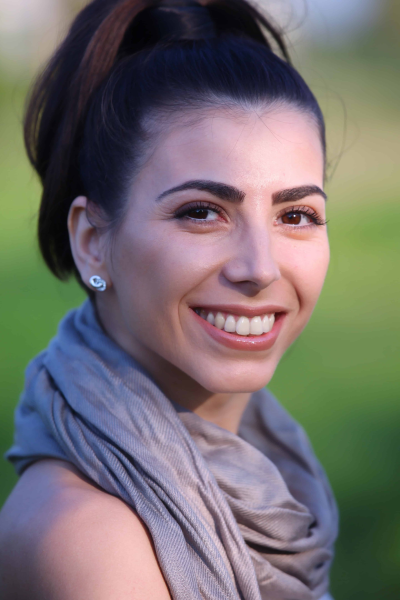

In [4]:
# Cambiamos el tamaño de la imagen
img = cv2.resize(img, (cols,rows), interpolation = cv2.INTER_AREA)
# Mostramos la cantidad de pixeles y la imagen
print('Size:', len(img[0]), 'x', len(img))
cv2_imshow(img)

Size: 400 x 600


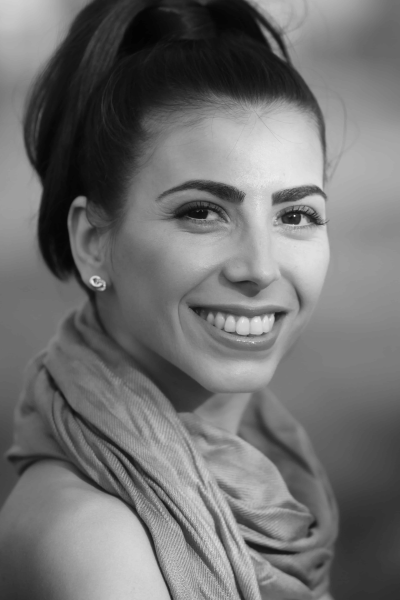

In [5]:
# Cambiamos la imagen a blanco y negro
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Mostramos la cantidad de pixeles y la imagen
print('Size:', len(img[0]), 'x', len(img))
cv2_imshow(img)

Size: 400 x 600


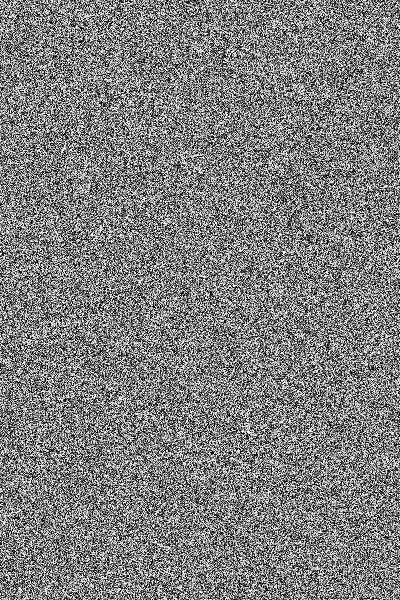

In [6]:
# Creamos una imagen random en blanco y negro del mismo tamaño
import numpy as np
random_img = np.random.randint(0,255, (rows, cols))
# Mostramos la cantidad de pixeles y la imagen
print('Size:', len(random_img[0]), 'x', len(random_img))
cv2_imshow(random_img)

In [7]:
# Definimos la función para crear la sucesión
def convergence(ni, nf, max_iters, learning_rate, save_iters):
    images = []
    for i in range(max_iters):
        gradient = ni - nf
        ni = ni - learning_rate * gradient
        if i+1 in save_iters:
            images.append(np.ravel(ni))
    return ni, images

In [8]:
# Definimos las 10 iteraciones que se van a guardar de la sucesión
save_iters = [i * 100 for i in range(1, 11)]
print(save_iters)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


In [9]:
# Creamos una sucesión de la imagen random a la real
convergence_img, images = convergence(random_img, img, max_iters=1000, learning_rate=0.001, save_iters=save_iters)

Suceción en el termino 100


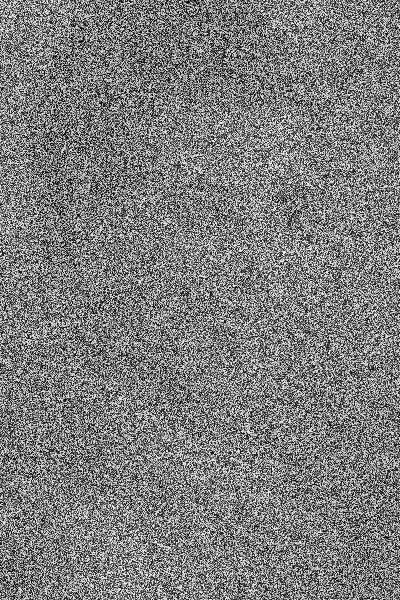


Suceción en el termino 200


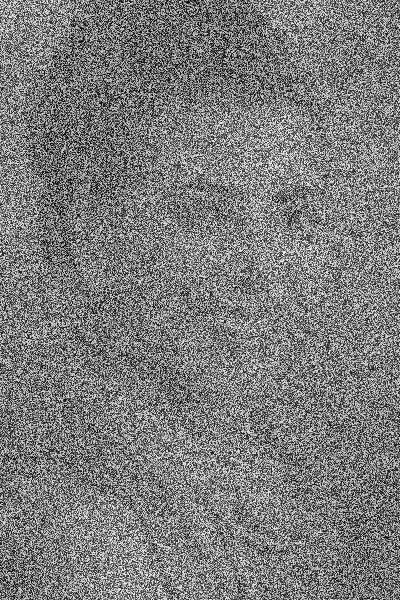


Suceción en el termino 300


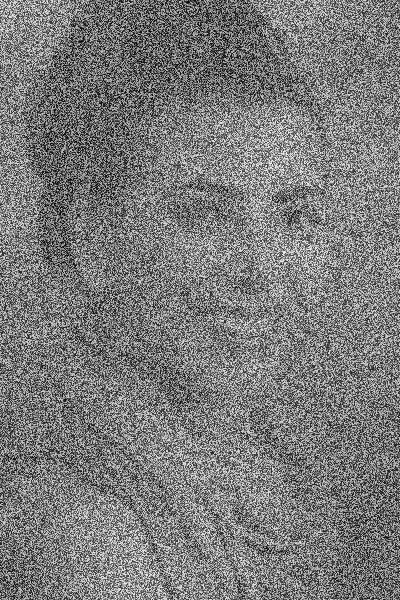


Suceción en el termino 400


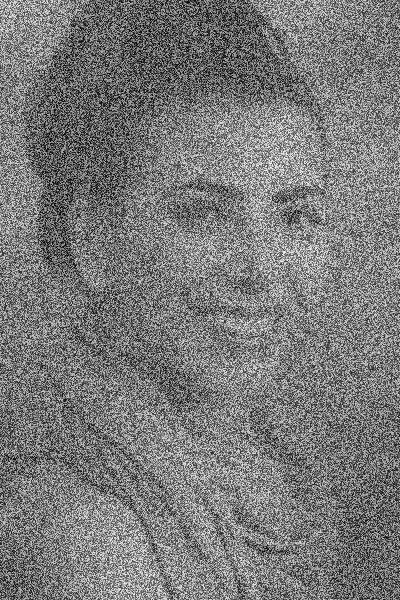


Suceción en el termino 500


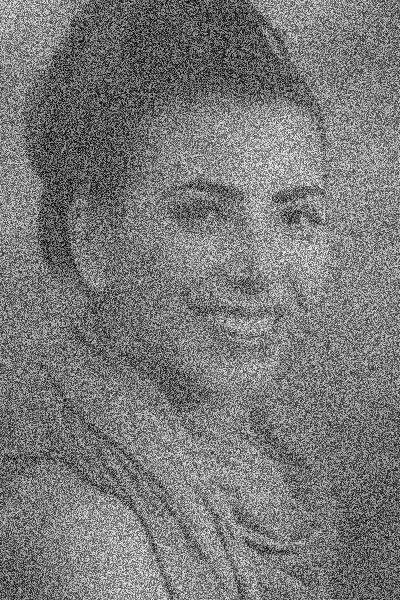


Suceción en el termino 600


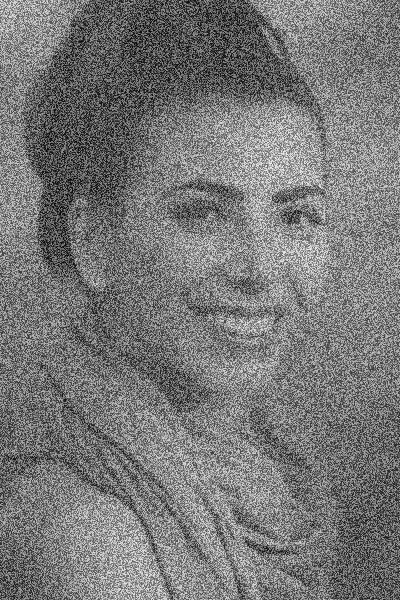


Suceción en el termino 700


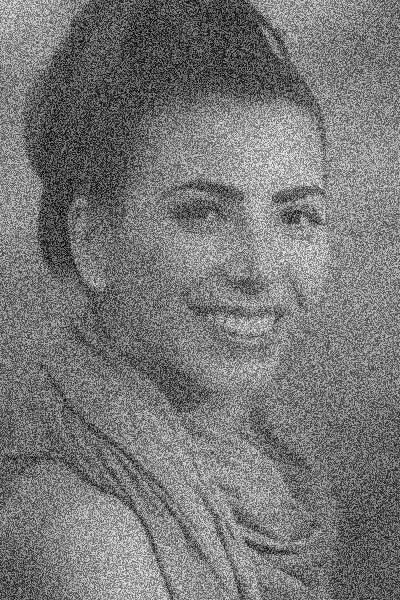


Suceción en el termino 800


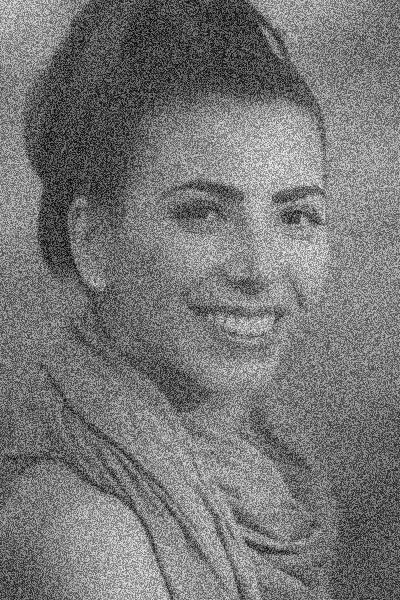


Suceción en el termino 900


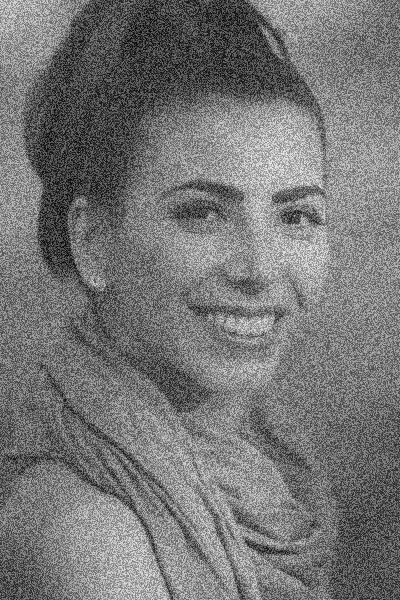


Suceción en el termino 1000


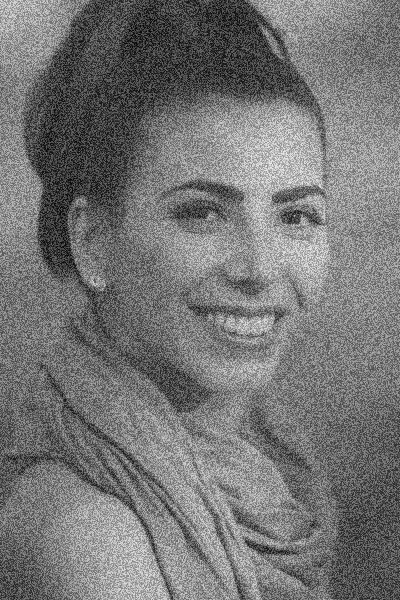

In [10]:
# Imprimimos 10 terminos de la sucesión
for i in range(10):
    print(f'Suceción en el termino {save_iters[i]}')
    cv2_imshow(images[i].reshape(rows,cols))
    print()